In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
DB_FILE = 'sales_data.db'

In [3]:
sample_sales_data = [
    ('Laptop', 10, 1500.00),    # 10 * 1500 = 15000
    ('Keyboard', 50, 30.00),    # 50 * 30 = 1500
    ('Monitor', 25, 600.00),     # 25 * 600 = 15000
    ('Laptop', 5, 1450.00),     # 5 * 1450 = 7250
    ('Mouse', 80, 15.00),       # 80 * 15 = 1200
    ('Monitor', 10, 580.00),    # 10 * 580 = 5800
    ('Keyboard', 30, 32.00)     # 30 * 32 = 960
]

In [4]:
SUMMARY_QUERY = """
SELECT 
    product, 
    SUM(quantity) AS total_qty, 
    SUM(quantity * price) AS revenue 
FROM 
    sales 
GROUP BY 
    product
ORDER BY
    revenue DESC;
"""

In [5]:
print("--- Starting Database Setup ---")

--- Starting Database Setup ---


In [6]:
conn = sqlite3.connect(DB_FILE)
cursor = conn.cursor()

In [7]:
cursor.execute('DROP TABLE IF EXISTS sales') # Clears old data if script is run again
cursor.execute("""
CREATE TABLE sales (
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

In [8]:
cursor.executemany('INSERT INTO sales VALUES (?, ?, ?)', sample_sales_data)

In [9]:
conn.commit()
conn.close()
print(f"Database '{DB_FILE}' created and populated successfully.")

Database 'sales_data.db' created and populated successfully.


In [10]:
print("\n--- Running Data Analysis ---")


--- Running Data Analysis ---


In [11]:
conn = sqlite3.connect(DB_FILE)

In [12]:
df_summary = pd.read_sql_query(SUMMARY_QUERY, conn)

In [13]:
conn.close()

In [14]:
print("\n--- Sales Summary Report ---")


--- Sales Summary Report ---


In [15]:
total_revenue = df_summary['revenue'].sum()
total_quantity = df_summary['total_qty'].sum()

print(f"1. Total Quantity Sold (All Products): {total_quantity:.0f}")
print(f"2. Total Revenue (All Products): ${total_revenue:,.2f}") # Format as currency

print("\nProduct-wise Breakdown:")
print(df_summary)


1. Total Quantity Sold (All Products): 210
2. Total Revenue (All Products): $46,710.00

Product-wise Breakdown:
    product  total_qty  revenue
0    Laptop         15  22250.0
1   Monitor         35  20800.0
2  Keyboard         80   2460.0
3     Mouse         80   1200.0



--- Bar chart saved as: sales_bar_chart.png ---


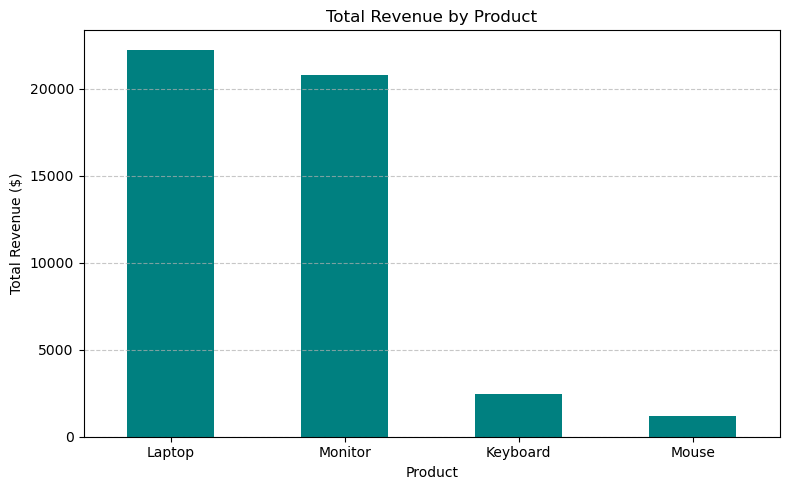


--- Task Completed ---


In [16]:
plt.figure(figsize=(8, 5))

# Plotting the 'revenue' column against the 'product' column
df_summary.plot(
    kind='bar', 
    x='product', 
    y='revenue', 
    title='Total Revenue by Product', 
    legend=False,
    color='teal',
    ax=plt.gca()
)

# Customize chart labels
plt.xlabel('Product')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=0) # Keep product names horizontal
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Save the chart (one of the final deliverables)
CHART_FILE = 'sales_bar_chart.png'
plt.savefig(CHART_FILE)
print(f"\n--- Bar chart saved as: {CHART_FILE} ---")

# Display the chart
plt.show()

print("\n--- Task Completed ---")